#**Project Business Statistics: E-news Express**

- Student: Alexey Tyurin
- Group: Oct'22 C Sun - MLS Grp B
- Batch: PGP-DSBA-UTA-OCT22-C
- Date: 1/25/2023

##**Define Problem Statement and Objectives**

###**Business Context**
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

###**Objective**
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

###**Data Dictionary**
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. `user_id` - Unique user ID of the person visiting the website
2. `group` - Whether the user belongs to the first group (control) or the second group (treatment)
3. `landing_page` - Whether the landing page is new or old
4. `time_spent_on_the_page` - Time (in minutes) spent by the user on the landing page
5. `converted` - Whether the user gets converted to a subscriber of the news portal or not
6. `language_preferred` - Language chosen by the user to view the landing page

###**Solution Approach**

To solve the above problem, we need to answer four questions:
1. Is the average time users spend on the new landing page significantly greater than the average time spent on the existing landing page?
2. Is the difference in proportions of the users who visited the landing pages (existing and new) and got converted (conversion rate) for the new page significantly greater to conclude that the conversion rate for the new page is greater than the conversion rate for the existing page?
3. Is the conversion and preferred language independent or related?
4. Is the average time users spent on the new page the same for the different language users?

##**Import all the necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

##**Reading the Data into a DataFrame**

In [2]:
# read the dataset
data = pd.read_csv('abtest.csv')
df = data[:]

##**Explore the dataset and extract insights using Exploratory Data Analysis**

###**Data Overview**
The initial steps to get an overview of any dataset is to:

* observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
* get information about the number of rows and columns in the dataset
* find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected
* check the statistical summary of the dataset to get an overview of the numerical columns of the data

####Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not

 **Displaying the first few rows of the dataset**

In [3]:
# view the first five rows of the dataset
df.head()

user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish

**Displaying the last few rows of the dataset**

In [4]:
# view the last five rows of the dataset
df.tail()

user_id      group landing_page  time_spent_on_the_page converted  \
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86       yes   

   language_preferred  
95            Spanish  
96            English  
97            Spanish  
98            Spanish  
99            English

####Get information about the number of rows and columns in the dataset

**Checking the shape of the dataset**

In [5]:
# view the shape of the dataset
df.shape

(100, 6)

The dataset contains 100 rows and 6 columns.

####Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

**Checking the data types of the columns for the dataset**

In [6]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 4 categorical columns and two numeric columns in the dataset.

####Check the statistical summary of the dataset to get an overview of the numerical columns of the data

**Getting the statistical summary for the numerical variables**

In [7]:
# Statistical summary of the numerical variables
df.describe()

user_id  time_spent_on_the_page
count     100.000000              100.000000
mean   546517.000000                5.377800
std        52.295779                2.378166
min    546443.000000                0.190000
25%    546467.750000                3.880000
50%    546492.500000                5.415000
75%    546567.250000                7.022500
max    546592.000000               10.710000

**Getting the statistical summary for the categorical variables**

In [8]:
# Statistical summary of the categorical variables
def cat_describe(col):
  print(f'Statistical summary of the categorical variable `{col}`:')
  display(pd.DataFrame({'frequency': df.value_counts(col), 
                        'percentage': df.value_counts(col, normalize=True)}))
  print('-'*80)

for col in df.select_dtypes('object'):
  cat_describe(col)

Statistical summary of the categorical variable `group`:


frequency  percentage
group                           
control           50         0.5
treatment         50         0.5

--------------------------------------------------------------------------------
Statistical summary of the categorical variable `landing_page`:


frequency  percentage
landing_page                       
new                  50         0.5
old                  50         0.5

--------------------------------------------------------------------------------
Statistical summary of the categorical variable `converted`:


frequency  percentage
converted                       
yes               54        0.54
no                46        0.46

--------------------------------------------------------------------------------
Statistical summary of the categorical variable `language_preferred`:


frequency  percentage
language_preferred                       
French                     34        0.34
Spanish                    34        0.34
English                    32        0.32

--------------------------------------------------------------------------------


**Check for missing values**

In [9]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the data.

**Check for duplicates**

In [10]:
df.duplicated().sum()

0

There are no duplicate rows in the data.

In [11]:
df['user_id'].nunique()

100

`user_id` is unique

In [12]:
# Categorical columns
cats = list(df.select_dtypes('object'))

#Looking for columns that duplicate data
for i in range(0, len(cats)-1):
  for j in range(i+1, len(cats)):
    if (pd.crosstab(df[cats[i]], df[cats[j]])==0).sum().sum()>0:
      display(pd.crosstab(df[cats[i]], df[cats[j]]))

landing_page  new  old
group                 
control         0   50
treatment      50    0

* Columns `landing_page` and `group` carry the same information and duplicate each other. 
  * Control group used old page
  * Treatment group used new page
* Removing `landing_page` column from the working dataset

In [13]:
cats.remove('landing_page')
df = df.drop('landing_page', axis=1).set_index('user_id', drop=True)

####EDA insights:
* The original dataset contains 100 rows and 6 columns
  * There are 4 categorical columns and two numeric columns in the dataset
  * The `user_id` is a column consisting of unique user-ids
  * `landing_page` colum duplicated data in `group` column and was removed
* There are no missing values in the data
* There are no duplicate rows in the data
* The mean time spent by the user on the landing page (5.38 mins) is close to the median time (5.42 mins)
* The maximum time users spent on the landing page is 10.71 minutes, minimum is 0.19 mins

###**Univariate Analysis**


Analysing the `time_spent_on_the_page` column


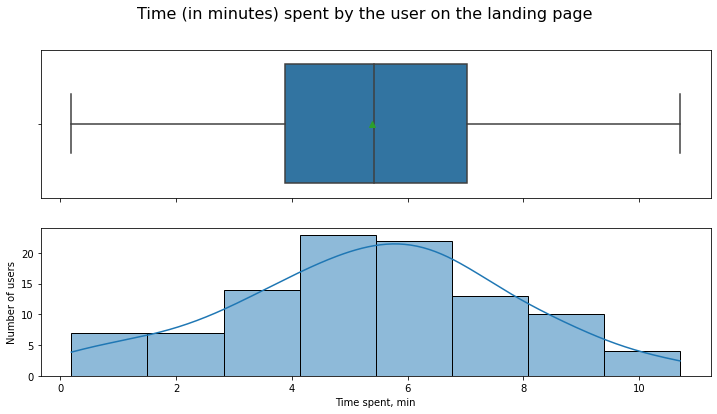

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)
fig.suptitle('Time (in minutes) spent by the user on the landing page', fontsize=16); 

sns.boxplot(data=df, x='time_spent_on_the_page', showmeans=True, ax=ax[0]);
sns.histplot(data=df, x='time_spent_on_the_page', ax=ax[1], kde=True);

ax[0].set_xlabel('')
ax[1].set_xlabel('Time spent, min')
ax[0].set_ylabel('')
ax[1].set_ylabel('Number of users');

plt.show()

In [15]:
# Creating list for the columns' names
vars = {'time_spent_on_the_page': 'Time spent',
        'group': 'Group', 
        'landing_page': 'Page',
        'converted': 'Converted',
        'language_preferred': 'Language'}

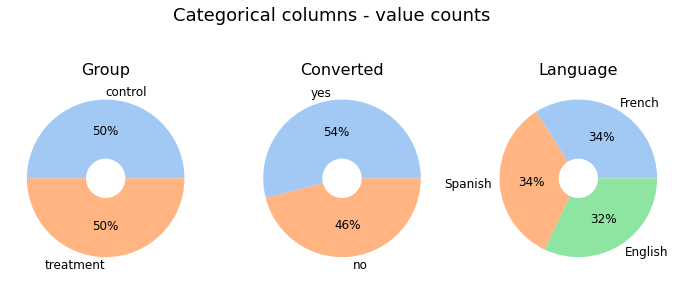

In [16]:
# Categorical columns value counts
fig, ax = plt.subplots(nrows=1, ncols=len(cats), figsize=(12, 5))
fig.suptitle('Categorical columns - value counts', fontsize=18);
colors = sns.color_palette('pastel')[0:3]

for i, row in enumerate(cats):
  ax[i].pie(df.value_counts(row), labels=df.value_counts(row).index, colors=colors, autopct='%.0f%%', textprops={'fontsize': 12})
  ax[i].add_artist(plt.Circle((0, 0), 0.25, fc='white'))
  ax[i].set_title(vars[row], fontsize=16)
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')

plt.show();

**Univariate Analysis conclusions:**
* Distribution of the time spent by the user on the landing page is symmetric bell shaped, unimodal, no outliers were observed
* There were 2 groups: `control` and `treatment` by 50 observations (50\%) in each group
* 54 users converted to a subscriber of the news portal, and 46 - did not.
* There were 3 languages to view the landing page: French, Spanish, and English - 34/34/32 users for each accordingly
* There was only one numeric column `time_spent_on_the_page`

|index|time\_spent\_on\_the\_page|
|---|---|
|count|100\.0|
|mean|5\.3778|
|std|2\.3782|
|min|0\.19|
|25%|3\.88|
|50%|5\.415|
|75%|7\.0225|
|max|10\.71|


###**Bivariate Analysis**

In [17]:
# time_spent_on_the_page by groups
bi = []
for c in cats:
  for v in df[c].unique():
    bi.append([c, v,
               f'{df[df[c] == v].time_spent_on_the_page.mean():.2f}',
               f'{df[df[c] == v].time_spent_on_the_page.std():.2f}',
               f'{stats.iqr(df[df[c] == v].time_spent_on_the_page):.2f}',
               f'{df[df[c] == v].time_spent_on_the_page.count():d}'])
bi = pd.DataFrame(data=bi, columns=['var', 'value', 'mean', 'std', 'iqr', 'count'])
bi

var      value  mean   std   iqr count
0               group    control  4.53  2.58  3.72    50
1               group  treatment  6.22  1.82  1.98    50
2           converted         no  3.92  2.23  2.59    46
3           converted        yes  6.62  1.71  1.87    54
4  language_preferred    Spanish  5.33  1.82  2.04    34
5  language_preferred    English  5.56  2.62  3.52    32
6  language_preferred     French  5.25  2.68  3.97    34

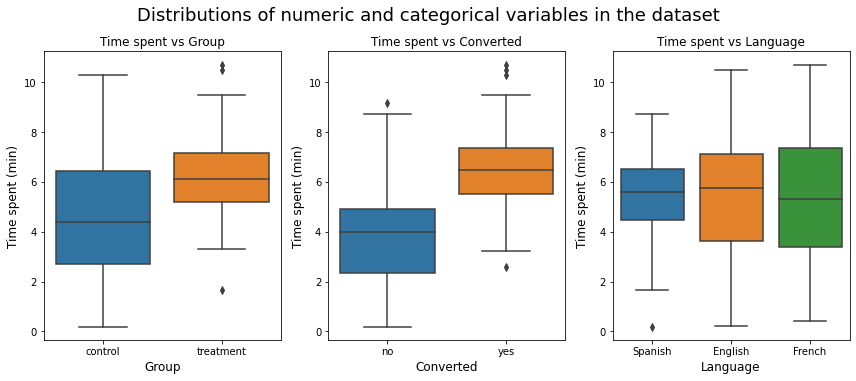

In [18]:
# Distributions of numeric and categorical variables in the dataset
fig, ax = plt.subplots(nrows=1, ncols=len(cats), figsize=(12, 5))
fig.suptitle('Distributions of numeric and categorical variables in the dataset', fontsize=18, y=1.05);

for i, row in enumerate(cats):
  sns.boxplot(y=df['time_spent_on_the_page'], x=df[row], ax=ax[i], orient='v')
  ax[i].set_title('Time spent vs ' + vars[row], fontsize=12)
  ax[i].set_ylabel('Time spent (min)', fontsize=12)
  ax[i].set_xlabel(vars[row], fontsize=12)

plt.tight_layout()
plt.show();

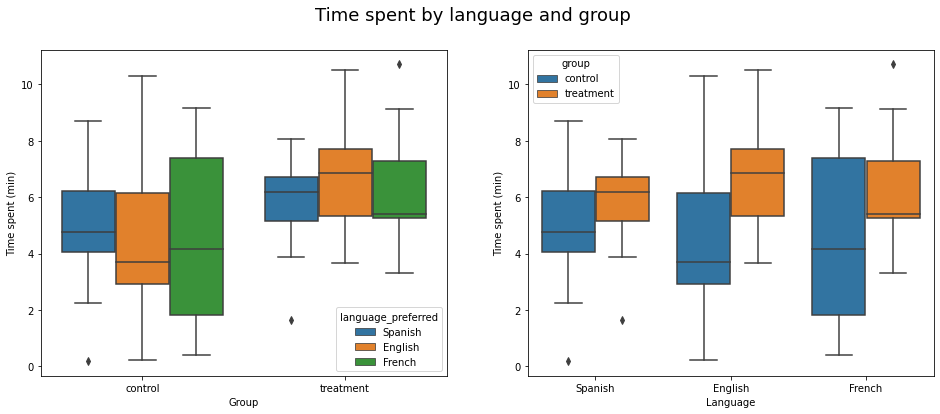

In [19]:
# Time spent by language and group
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Time spent by language and group', fontsize=18);

sns.boxplot(y=df['time_spent_on_the_page'], x=df['group'], hue=df['language_preferred'], ax=ax[0], orient='v')
sns.boxplot(y=df['time_spent_on_the_page'], x=df['language_preferred'], hue=df['group'], ax=ax[1], orient='v')
ax[0].set_ylabel('Time spent (min)')
ax[0].set_xlabel('Group')
ax[1].set_ylabel('Time spent (min)')
ax[1].set_xlabel('Language')

plt.show();

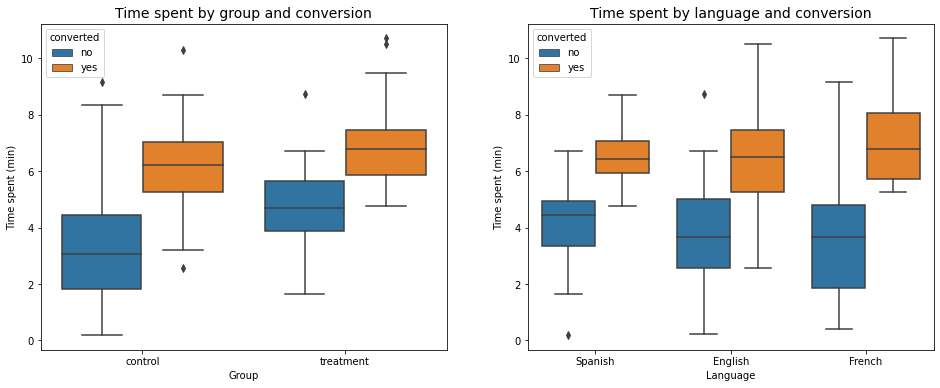

In [20]:
# Time spent by language and group
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y=df['time_spent_on_the_page'], x=df['group'], hue=df['converted'], ax=ax[0], orient='v')
sns.boxplot(y=df['time_spent_on_the_page'], x=df['language_preferred'], hue=df['converted'], ax=ax[1], orient='v')
ax[0].set_title('Time spent by group and conversion', fontsize=14);
ax[0].set_ylabel('Time spent (min)')
ax[0].set_xlabel('Group')
ax[1].set_title('Time spent by language and conversion', fontsize=14);
ax[1].set_ylabel('Time spent (min)')
ax[1].set_xlabel('Language')

plt.show();

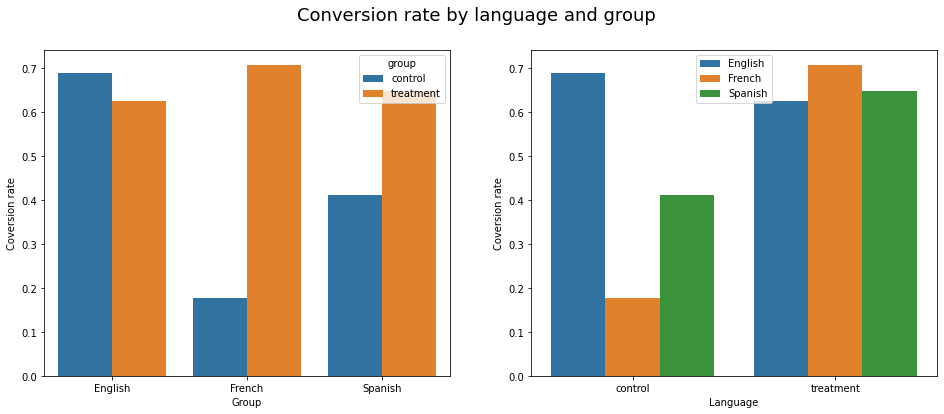

In [21]:
df_conv = df.replace({'converted': {'no': 0, 'yes': 1}}).groupby(['group', 'language_preferred']).mean()[['converted']].reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Conversion rate by language and group', fontsize=18);

sns.barplot(data=df_conv,y='converted', x='language_preferred', hue='group', ax=ax[0])
ax[0].set_ylabel('Coversion rate')
ax[0].set_xlabel('Group')

sns.barplot(data=df_conv, y='converted', x='group', hue='language_preferred', ax=ax[1])
ax[1].set_ylabel('Coversion rate')
ax[1].set_xlabel('Language')
ax[1].legend(loc='upper center')

plt.show();

In [22]:
df_conv.pivot_table(index='group', columns='language_preferred', values='converted', margins=True)

language_preferred  English    French   Spanish       All
group                                                    
control             0.68750  0.176471  0.411765  0.425245
treatment           0.62500  0.705882  0.647059  0.659314
All                 0.65625  0.441176  0.529412  0.542279

**Bivariate Analysis conclusions:**
* **Mean time**
  * The mean time in the treatment group (6.22') is greater than in the control group (4.53')
    * Standard deviation & IQR is less for the treatment group
    * There are a few outliers in the treatment group only
  * Mean time for converted users (6.62') is greater than not converted (3.92')
    * Standard deviation & IQR is less for those who converted
    * There are a few outliers in the 'converted' group only
    * IQRs are not overlapped (Q1-converted is greater than Q3-not-converted)
  * Mean times for different languages are approximately the same (5.25' - 5.56')
    * Standard deviation and IQR for Spanish are less than for English and French
    * There is an outlier in the Spanish group only
* **Conversion rate**
  * Conversion rate of the Spanish and especially French-language users increased significantly on the new landing page (~1.5 times and ~3.5 times respectively)
  * Conversion rate of the English-language users did not change significantly on the new landing page
  * Conversion rate on the existing page varied from ~0.2 to 0.7, depending on the language
  * Conversion rate on the new page is approximately 0.65 for all languages
  * Conversion rate for the French language has improved significantly on the new landing page
* The average time converted users spent on the landing page is higher for all the groups and languages: Q1 of time converted users is consistently higher than Q3 of time non-converted users


##**1. Do the users spend more time on the new landing page than the existing landing page?**

### Perform Visual Analysis

In [23]:
df.groupby('group').describe()

time_spent_on_the_page                                        \
                           count    mean       std   min    25%    50%   
group                                                                    
control                     50.0  4.5324  2.581975  0.19  2.720  4.380   
treatment                   50.0  6.2232  1.817031  1.65  5.175  6.105   

                          
              75%    max  
group                     
control    6.4425  10.30  
treatment  7.1600  10.71

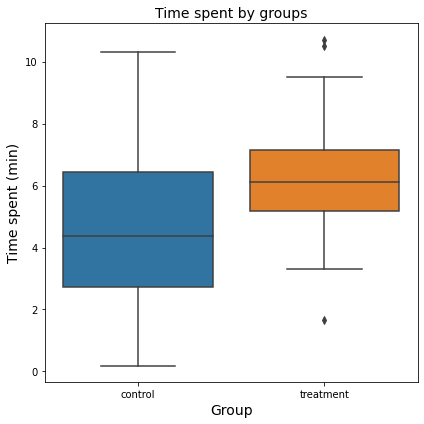

In [24]:
# Boxplot of `time_spent_on_the_page` by groups
fig, ax = plt.subplots(figsize=(6, 6)) 
sns.boxplot(y=df['time_spent_on_the_page'], x=df['group'])
ax.set_title('Time spent by groups', fontsize=14)
ax.set_ylabel('Time spent (min)', fontsize=14)
ax.set_xlabel('Group', fontsize=14)

plt.tight_layout()
plt.show();

* According to Visual Analysis, the users spend more time on the new landing page (treatment group) than on the existing landing page (control group)
* A higher standard deviation of the time spent in the existing landing page (control group) indicates data are more spread out
  *Contrary, data points of the treatment group are close to the mean
* The median time of the treatment group is within interquartile interval of the control group
* The median time of the control group is below Q1 of the treatment group

###**Hypothesis Testing**

### Step 1: Define the null and alternate hypotheses

**Let's write the null and alternative hypotheses**

>$H_0$: The mean time users spent on the new landing page is equal to the time users spent on the existing page. <br>
>$H_a$: The mean time users spent on the new landing page is greater than that from the existing landing page.

Let $\mu_1, \mu_2$ be the mean time from the new landing page and the mean time from the existing landing page, respectively. We will test the null hypothesis.

Mathematically, the above-formulated hypotheses can be written as follows:

>$H_0:\mu_1=\mu_2$ <br>
>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

The Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the time users in both groups spent with the two versions of the landing page was collected. We need to confirm that the users spend more time on the new landing page than the existing landing page.

This is a case of a one-tailed test comparing means from two populations. As we are comparing two means calculated from different sets of users, the two groups are independent. Also, the populations' standard deviations are unknown.

>Hence, a **Two Independent Sample T-test for Equality of Means (unequal standard deviations)** is the most appropriate test for this case.

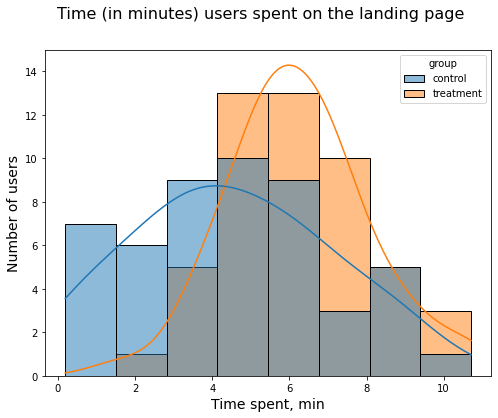

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Time (in minutes) users spent on the landing page', fontsize=16); 
sns.histplot(data=df, x='time_spent_on_the_page', hue='group', ax=ax, kde=True);
ax.set_xlabel('Time spent, min', fontsize=14)
ax.set_ylabel('Number of users', fontsize=14);
plt.show()

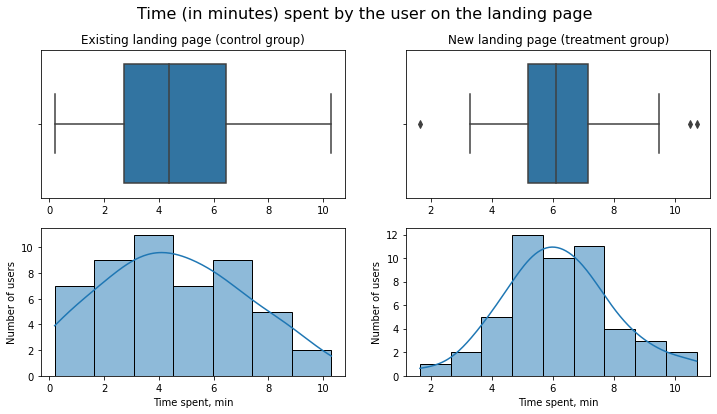

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
fig.suptitle('Time (in minutes) spent by the user on the landing page', fontsize=16); 

dfc = df[df['group']=='control']
dft = df[df['group']=='treatment']

sns.boxplot(data=dfc, x='time_spent_on_the_page', ax=ax[0,0]);
sns.histplot(data=dfc, x='time_spent_on_the_page', ax=ax[1,0], kde=True);

sns.boxplot(data=dft, x='time_spent_on_the_page', ax=ax[0,1]);
sns.histplot(data=dft, x='time_spent_on_the_page', ax=ax[1,1], kde=True);

ax[0,0].set_title('Existing landing page (control group)')
ax[0,0].set_xlabel('')
ax[1,0].set_xlabel('Time spent, min')
ax[1,0].set_ylabel('Number of users');

ax[0,1].set_title('New landing page (treatment group)')
ax[0,1].set_xlabel('')
ax[1,1].set_xlabel('Time spent, min')
ax[1,1].set_ylabel('Number of users');

plt.show()

**Sample statistics ( $\mu$ and $\sigma$ ) calculations**

In [27]:
print(f'Mean of time users spent on the old page is {dfc.time_spent_on_the_page.mean():.4f}, standard deviation of the sample is {dfc.time_spent_on_the_page.std():.4f}')
print(f'Mean of time users spent on the new page is {dft.time_spent_on_the_page.mean():.4f}, standard deviation of the sample is {dft.time_spent_on_the_page.std():.4f}')

Mean of time users spent on the old page is 4.5324, standard deviation of the sample is 2.5820
Mean of time users spent on the new page is 6.2232, standard deviation of the sample is 1.8170


**Shapiro-Wilk’s test** (Normally distributed populations)

We will test the null hypothesis

>$H_0:$ The time users spent on the landing page follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time users spent on the landing page do not not follow a normal distribution

In [28]:
pvc = stats.shapiro(dfc.time_spent_on_the_page).pvalue
pvt = stats.shapiro(dft.time_spent_on_the_page).pvalue
alpha = 0.05

print(f'The p-value for the existing page is {pvc:.4f}')
print(f'The p-value for the new page is {pvt:.4f}\n')

print('Normality of the control group:')
if (pvc < alpha): print(f'As the p-value {pvc:.2f} is less than the level of significance {alpha}, we reject the null hypothesis. ')
else: print(f'As the p-value {pvc:.2f} is greater than the level of significance {alpha}, we fail to reject the null hypothesis.')

print('Normality of the tretment group:')
if (pvt < alpha): print(f'As the p-value {pvt:.2f} is less than the level of significance {alpha}, we reject the null hypothesis. ')
else: print(f'As the p-value {pvt:.2f} is greater than the level of significance {alpha}, we fail to reject the null hypothesis.')


The p-value for the existing page is 0.4561
The p-value for the new page is 0.8040

Normality of the control group:
As the p-value 0.46 is greater than the level of significance 0.05, we fail to reject the null hypothesis.
Normality of the tretment group:
As the p-value 0.80 is greater than the level of significance 0.05, we fail to reject the null hypothesis.


>Since both p-values of the tests are greater than the 5% significance level,
we fail to reject the null hypothesis that the time users spent on
the landing page follows the normal distribution for both control and treatment groups. **The distributions follow normal distribution**

**Levene’s test** (Homogeneity of variances)

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [29]:
pv = stats.levene(dfc.time_spent_on_the_page, dft.time_spent_on_the_page).pvalue
alpha = 0.05

print(f'The p-value is {pv:.4f}\n')

if (pv < alpha): print(f'As the p-value {pv:.2f} is less than the level of significance {alpha}, we reject the null hypothesis. ')
else: print(f'As the p-value {pv:.2f} is greater than the level of significance {alpha}, we fail to reject the null hypothesis.')

The p-value is 0.0090

As the p-value 0.01 is less than the level of significance 0.05, we reject the null hypothesis. 


>Since p-value of the test is less than the 5% significance level, we can reject the null hypothesis that the variance of time users spent on the new page is equal to the variance of time on the existing page. **The sample standard deviations are different**.

**Let's test whether the T-test assumptions are satisfied or not**

- [x] `Continuous data` - **Yes**, the time users spent on the landing page is measured on a continuous scale
- [x] `Normally distributed populations` - **Yes**, we performed Shapiro-Wilk’s test that allows us to fail to reject the $H_0$, so the populations are assumed to be normal
- [x] `Independent populations` - **Yes**, as we are taking random samples for two different group of users, the two samples are from two independent populations
- [x] `Unequal population standard deviations` - **Yes**, as the sample standard deviations are different, the population standard deviations may be assumed to be different.
- [x] `Random sampling from the population` - **Yes**, we are informed that the collected sample is a simple random sample.

>We can use **Two Independent Sample T-test for Equality of Means (unequal standard deviations)** for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ as $0.05$.

Test at 0.05 level of significance whether the data provide sufficient evidence to conclude that the users spend more time on the new landing page than on the existing landing page.

In [30]:
alpha = 0.05

### Step 4: Collect and prepare data

In [31]:
old = dfc.time_spent_on_the_page # existing page (control group)
new = dft.time_spent_on_the_page # new page (treatment group)

### Step 5: Calculate the p-value

We can use function [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) of Scipy to compute the test statistic and p-value for this task as this is a test to compare two sample means from two independent populations when the population standard deviations are unknown.
Parameters are:
- `old`, `new`: two independent samples of scores (time users spent on the existing (old) and new landing pages, respectively);
- `eqaul_var`: is `False` as population variance as not equal;
- `alternative`: is `less` because the alternative hypoteses is that the `old` is less than `new`

In [32]:
# find the p-value
test_stat, p_value = stats.ttest_ind(old, new, equal_var = False, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [33]:
if p_value < alpha:
  print(f'As the p-value (~{p_value:.5f}) is less than the level of significance, we reject the null hypothesis.')
else:
  print(f'As the p-value (~{p_value:.5f}) is greater than the level of significance, we fail reject the null hypothesis.')

As the p-value (~0.00014) is less than the level of significance, we reject the null hypothesis.


As the p-value (~0.00014) is less than the level of significance (0.05), we reject the null hypothesis.

### Step 7:  Draw inference

>At 5% significance level, we reject the null hypothesis.
>Hence, we do have enough statistical evidence to say that the mean time users spend on the new landing page is greater that the mean time the users spent on the existing page.

**The users spend more time on the new landing page than on the existing landing page.**

##**2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

### Perform Visual Analysis

In [34]:
# create a function to draw fractions on the charts nicely
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'$\\frac{{{val:2.0f}}}{{{total:2.0f}}}$' + f' ({pct:.0f}%)'
    return my_autopct

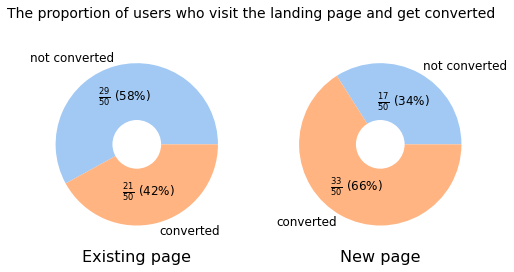

In [35]:
# Pie charts of the proportions
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
fig.suptitle('The proportion of users who visit the landing page and get converted', fontsize=14);
colors = sns.color_palette('pastel')[0:2]

pt = df.pivot_table(index='converted', columns='group', values='time_spent_on_the_page', aggfunc='count')
labels = ['not converted', 'converted']

ax[0].pie(pt['control'], colors=colors, labels=labels, autopct=make_autopct(pt['control']), textprops={'fontsize': 12})
ax[0].add_artist(plt.Circle((0, 0), 0.3, fc='white'))
ax[0].set_ylabel('')
ax[0].set_xlabel('Existing page', fontsize=16)
ax[1].pie(pt['treatment'], colors=colors, labels=labels, autopct=make_autopct(pt['treatment']), textprops={'fontsize': 12})
ax[1].add_artist(plt.Circle((0, 0), 0.3, fc='white'))
ax[1].set_ylabel('')
ax[1].set_xlabel('New page', fontsize=16)
plt.show();


>$p_1=\frac{33}{50}\\
p_2=\frac{21}{50}$


Visually and mathematically, the proportion of users from the samples who visited the new landing page and got converted is greater than that on the existing page.

$\frac{33}{50}>\frac{21}{50}$

###**Hypothesis Testing**

### Step 1: Define the null and alternate hypotheses


**Let's write the null and alternative hypothesis**

* `group` and `converted` are two categorical variables.
* We want to see if the proportion of users who visited the new landing page and get converted (**conversion rate**) is greater than the proportion of users who visited the existing landing page and get converted.

>$H_0:$ The conversion rate for new landing page users is equal to the conversion rate for the existing landing page users. <br>
>$H_a:$ The conversion rate for new landing page users is significantly greater than the conversion rate for the existing page users.

Let $p_1$ and $p_2$ be the proportions of users who visited the new and existing landing pages respectively and get converted. We will test the null hypothesis.

Mathematically, the above-formulated hypotheses can be written as follows:

>$H_0:p_1=p_2$ <br>
>$H_a:p_1>p_2$


### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a **Proportions Z test** for this problem.

**Let's test whether the Z-test assumptions are satisfied or not**

- [x] Binomially distributed populations - **Yes**, user either gets converted to a subscriber of the news portal or not 
- [x] Independent populations - **Yes**, as we are taking random samples for two different group of users, the two samples are from two independent populations
- [x] Random sampling from the populations - **Yes**, we are informed that the collected sample is a simple random sample
- [x] Can the binomial distribution approximated to normal distribution - **Yes**, for binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively. 

>$n_1p_1 = 50 \cdot \frac{33}{50} = 33 \geq 10\\
n_1(1-p_1) = 50 \cdot \frac{50-33}{50} = 17 \geq 10 \\
n_2p_2 = 50 \cdot \frac{21}{50} = 21 \geq 10\\
n_2(1-p_2) = 50 \cdot \frac{50-21}{50} = 29 \geq 10 $


>We can use one-sided 2-sample **Z-test for Proportions** for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ as $0.05$.

In [36]:
alpha = 0.05

### Step 4: Collect and prepare data

In [37]:
# set the counts of converted users
converted_users = np.array([pt.loc['yes'].treatment, pt.loc['yes'].control])

# set the sample sizes
nobs = np.array(pt.sum(axis=0).values)

print(f'Counts of converted users: {converted_users}')
print(f'Sample sizes: {nobs}')


Counts of converted users: [33 21]
Sample sizes: [50 50]


### Step 5: Calculate the p-value

We can use function [`proportions_ztest()`](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html) of `statsmodels` to compute the test statistic and p-value for this task as this function uses a simple normal test for proportions.

Parameters are:
- `count`:  is a list `converted_users`, the number of `converted` in nobs observations
- `nobs`: is `nobs`, the number of observations
- `alternative`: is `larger` because the alternative hypothesis is that proportion of converted users on the new page $p_1$ is greater than proportion of converted users on the existing page $p_2$

In [38]:
# find the p-value
test_stat, p_value = proportions_ztest(count=converted_users, nobs=nobs, alternative='larger')
print(f'The p-value is {p_value:.5f}')

The p-value is 0.00803


### Step 6: Compare the p-value with $\alpha$

In [39]:
if p_value > alpha:
  print(f'As the p-value ({p_value:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis')
else:
  print(f'As the p-value ({p_value:.3f}) is less than the significance level ({alpha}), we can reject the null hypothesis')

As the p-value (0.008) is less than the significance level (0.05), we can reject the null hypothesis


### Step 7:  Draw inference

>As the p-value is less than the significance level 0.05, we reject the null hypothesis.
Hence, we have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new landing page users is greater than the conversion rate for the existing page users.

**The conversion rate for the new page is greater than the conversion rate for the old page.**

##**3. Is the conversion and preferred language are independent or related?**

### Perform Visual Analysis

* Since both the concerned variables are categorical, we can use a contingency table and a stacked bar graph to inspect the data visually.
* It was not clear from the objectives, but we can assume that the question is about the experience of the treatment group on the new landing page. However, let us perform this analysis for both groups

In [40]:
# create a pivot table to see the numbers of users from the sample grouped by group, language and conversion indicator

groups = df.group.unique()
pages = ['Existing page', 'New page', 'Total']
langs = df.language_preferred.unique()

pt = df.pivot_table(index=['group', 'language_preferred'], columns='converted', values='time_spent_on_the_page', aggfunc='count')
pt

converted                     no  yes
group     language_preferred         
control   English              5   11
          French              14    3
          Spanish             10    7
treatment English              6   10
          French               5   12
          Spanish              6   11

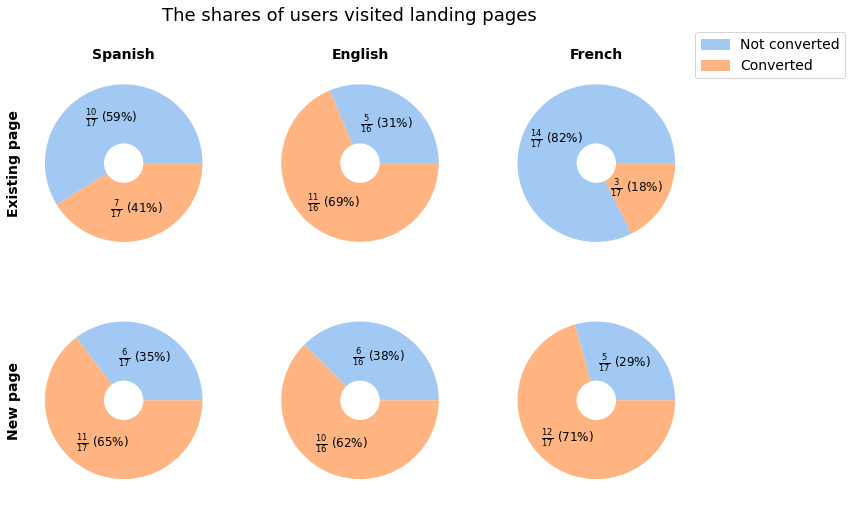

In [41]:
# Pie charts of the proportions
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle('The shares of users visited landing pages', fontsize=18);
colors = sns.color_palette('pastel')[0:2]

legend_handles = [Patch(color=colors[0]), Patch(color=colors[1])]
legend_labels = ['Not converted', 'Converted']

for i, group in enumerate(groups):
  for j, lang in enumerate(langs):
    ax[i, j].pie(pt.loc[(group, lang)], colors=colors, autopct=make_autopct(pt.loc[(group, lang)]), textprops={'fontsize': 12})
    ax[i, j].add_artist(plt.Circle((0, 0), 0.25, fc='white'))
    if i == 0: ax[i, j].set_title(lang, weight='bold', fontsize=14)
    if j == 0: ax[i, j].set_ylabel(pages[i], weight='bold').set_fontsize('14')

ax[0,2].legend(handles=legend_handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.8, 1.2, 0, 0), fontsize=14)

plt.show();

* There are a total of 50 users in the control group (existing page) sample
  * In the Spanish language group, 7 out of 17 (or 41%) users were converted
  * In the English language group, 11 out of 16 (or 69%) users were converted
  * In the French language group, 3 out of 17 (or 18%) users were converted

* There are a total of 50 users in the treatment group (new page) sample
  * In the Spanish language group, 11 out of 17 (or 65%) users were converted
  * In the English language group, 10 out of 16 (or 62%) users were converted
  * In the French language group, 12 out of 17 (or 71%) users were converted

To vizaulize the relationship between the two categorical variables, we can plot a stacked bar charts.

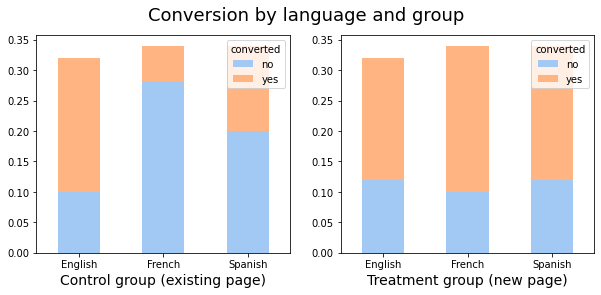

In [42]:
# Pie charts of the proportions
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle('Conversion by language and group', fontsize=18);

colors = sns.color_palette('pastel')[0:2]
dfc=df[df.group=='control']
dft=df[df.group=='treatment']

pd.crosstab(index=dfc.language_preferred, columns=dfc.converted, normalize=True).plot(kind='bar', stacked=True, color=colors, ax=ax[0])
ax[0].set_xlabel('Control group (existing page)', fontsize=14)
ax[0].tick_params(axis='x', labelrotation=0)
pd.crosstab(index=dft.language_preferred, columns=dft.converted, normalize=True).plot(kind='bar', stacked=True, color=colors, ax=ax[1])
ax[1].set_xlabel('Treatment group (new page)', fontsize=14)
ax[1].tick_params(axis='x', labelrotation=0)

plt.show();

* Control group (existing page)
  * The proportion of converted users is significantly low in the French language group (compared with two other groups)
  * Based on the sample data, we can infer that the proportion of converted users is lower for one language group, but we can not say if this difference is significant enough to conclude that the conversion is dependent on the preferred language

* Treatment group (new page)
  * The proportion of converted users seems similar for all the language groups
  * The share of converted users is greater than not-converted
  * Based on the sample data, we can infer that the proportion of converted users is the same for all the language groups

* Existing page vs. New page
  * Conversion of the English language group is similar for the existing and the new pages
  * Conversion of the French language group is significantly higher on the new page
  * Conversion of the Spanish language group is slightly higher on the new page


###**Hypothesis Testing**

### Step 1: Define the null and alternate hypotheses

**Let's write the null and alternative hypothesis**

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends on preferred language.


### Step 2: Select Appropriate test

A Chi-square test for independence is used to test the dependence between two categorical variables.

A **Chi-square test for independence** is based on the Chi-square probability distribution. It involves the calculation of a chi-square test statistic. A chi-square ($\chi^2$) statistic is a measure of the difference between the observed and expected frequencies of the outcomes of a set of events or variables, given the size of the sample and the number of variables in the relationship. The test compares what we observe in the random sample to what we expect to observe when we assume there is no relationship between the two variables.

In [43]:
# Chech the number of sample observations in each level of the variable 

print('Numbers of sample observations in each level of the variable\n','-'*60)
df.pivot_table(index='language_preferred', columns='converted', values='time_spent_on_the_page', aggfunc='count', margins=True)

Numbers of sample observations in each level of the variable
 ------------------------------------------------------------


converted           no  yes  All
language_preferred              
English             11   21   32
French              19   15   34
Spanish             16   18   34
All                 46   54  100

**Let's test whether the assumptions are satisfied or not**

- [x] Categorical variables, **Yes**, `converted` and `language_preferred` are categorical variables
- [x] Expected value of the number of sample observations in each level of the variable is at least 5 - **Yes**, the number of observations in each level is greater than 5
- [x] Random sampling from the population - **Yes**, we are informed that the collected sample is a simple random sample

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ as $0.05$.

In [44]:
alpha = 0.05

### Step 4: Collect and prepare data

Let's prepare the data for the test. First, to perform the chi-square test of independence, we need to create the contingency table, for which we will use pd.crosstab()

In [45]:
# Treatment group (new page)
contingency_table = pd.crosstab(dft.language_preferred, dft.converted)
contingency_table

converted           no  yes
language_preferred         
English              6   10
French               5   12
Spanish              6   11

### Step 5: Calculate the p-value

We will use the [`chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function from the Scipy stats library to perform the hypothesis test. It takes the contingency table as an input and returns the test statistic, p-value, degrees of freedom, and the expected frequencies as the output.

In [46]:
# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.8783081441552572


### Step 6: Compare the p-value with $\alpha$

In [47]:
if p_value > alpha:
  print(f'As the p-value ({p_value:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis')
else:
  print(f'As the p-value ({p_value:.3f}) is less than (or equal to) the significance level ({alpha}), we can reject the null hypothesis')

As the p-value (0.878) is greater than the significance level (0.05), we fail to reject the null hypothesis


### Step 6.1: Calculate p-value and compare the p-value with $\alpha$ for the control group (existing page)

In [48]:
# Control group (old page)
contingency_table = pd.crosstab(dfc.language_preferred, dfc.converted)
chi, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value > alpha: print(f'As the p-value ({p_value:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis')
else: print(f'As the p-value ({p_value:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis')

As the p-value (0.012) is less than the significance level (0.05), we reject the null hypothesis


### Step 7:  Draw inference

>Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the conversion depends on the preferred language for the treatment group of users of the new landing page.
>  * We reject the null hypothesis for users of the existing page, as the p-value is less than the 5% significance level. Hence, we have enough statistical significance to say that conversion depends on the preferred language for the control group of users who used the existing landing page.
>  * It seems that the new page was significantly improved for French language users from the conversion standpoint<br>
>
>**The conversion and preferred language are independent** for the treatment group (new page)

##**4. Is the time spent on the new page same for the different language users?**

### Perform Visual Analysis

In [49]:
new = df[df['group']=='treatment']
new.groupby('language_preferred').mean()['time_spent_on_the_page']

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

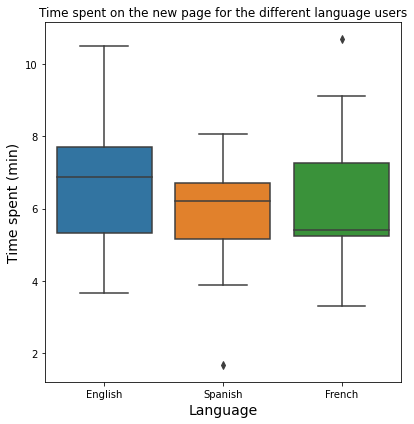

In [50]:
# Boxplot of `time_spent_on_the_page` by languages
fig, ax = plt.subplots(figsize=(6, 6)) 
sns.boxplot(y=new['time_spent_on_the_page'], x=new['language_preferred'])
ax.set_title('Time spent on the new page for the different language users')
ax.set_ylabel('Time spent (min)', fontsize=14)
ax.set_xlabel('Language', fontsize=14)

plt.tight_layout()
plt.show();

**Here, `time_spent_on_the_page` is the response and `language_preferred` is the factor.**

* The distribution of time spent seem to differ among the three groups
* English seems to impact the longest time spent on the new landing page
* The median time spent seems to be very close for English and Spanish preferred language groups, but the variation is less for Spanish as compared to English and French

*We cannot say that the observed difference in time spent among the three groups is significant enough to conclude the same about the three language groups.*

**To determine this, we will test the difference using a statistical test.**

###**Hypothesis Testing**

### Step 1: Define the null and alternate hypotheses

**Let's write the null and alternative hypothesis**

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean time spent on the new page with respect to each language preferences is equal. <br>
> $H_a$ : At least one of the mean time spent on the new page with respect to the three language preferences is different.

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for the English, Spanish, and French users, respectively. We will test the null hypothesis.

Mathematically, the above-formulated hypotheses can be written as follows:

>$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
>$H_a:$ At least one of the means is different from the rest.


Let us test the normality of the distribution of time users spent on the new landing page and the homogeneity of variance for three different language groups.

**Shapiro-Wilk’s test (Assumption 1: Normality)**

We will test the null hypothesis

>$H_0:$ The time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the new page does not follow a normal distribution

In [51]:
# The shapiro() function of Scipy will be used to compute the test statistic and p-value

# find the p-value
w, p_value = stats.shapiro(new['time_spent_on_the_page']) 
print(f'The p-value is {p_value:.2f}')

The p-value is 0.80


>Since p-value of the test is very large, we fail to reject the null hypothesis that the response (the time users spent on the new page) follows the normal distribution.

**Levene’s test (Assumption 2: Homogeneity of Variance)**

We will test the null hypothesis.

>$H_0$: All the variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [52]:
# The levene() function of Scipy will be used to compute the test statistic and p-value

statistic, p_value = stats.levene(new['time_spent_on_the_page'][new['language_preferred']=="English"],
                                  new['time_spent_on_the_page'][new['language_preferred']=="Spanish"],
                                  new['time_spent_on_the_page'][new['language_preferred']=="French"])
# find the p-value
print(f'The p-value is {p_value:.2f}')


The p-value is 0.47


>Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances

**The normality and equality of variance assumptions checks**

- [x] For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
- [x] For equality of variance, Levene test is applied to the response variable.


### Step 2: Select Appropriate test

This is a problem, concerning three population means. **One-way ANOVA** is an appropriate test here provided normality and equality of variance assumptions are verified.

**One-way ANOVA test**

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

**Let's test whether the assumptions are satisfied or not**

- [x] The populations are normally distributed - **Yes**, the normality assumption is verified using the Shapiro-Wilk’s test
- [x] Samples are independent simple random samples - **Yes**, we are informed that the collected sample is a simple random sample
- [x] Population variances are equal - **Yes**, the homogeneity of variance assumption is verified using the Levene's test

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ as $0.05$.

In [53]:
alpha = 0.05

### Step 4: Collect and prepare data

In [54]:
# create separate variables to store the time spent with respect to the three languages
en = new[new['language_preferred']=="English"]['time_spent_on_the_page']
es = new[new['language_preferred']=="Spanish"]['time_spent_on_the_page']
fr = new[new['language_preferred']=="French"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

* We will use the [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html]) function from the `scipy.stats` library to perform a one-way ANOVA test.
* The `f_oneway()` function takes the sample observations from the different groups and returns:
  * the test statistic and 
  * the p-value for the test.
* The sample observations are the values of time spent with respect to the three language preferences.

In [55]:
# find the p-value
test_stat, p_value = stats.f_oneway(en, es, fr)
print(f'The p-value is {p_value:.4f}')

The p-value is 0.4320


### Step 6: Compare the p-value with $\alpha$

In [56]:
# print the conclusion based on p-value
if p_value < alpha:
    print(f'As the p-value {p_value:.5f} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value:.5f} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

>Since the p-value is greater than the level of significance (5%), we fail to reject the null hypothesis. <br>
>Hence, we do not have enough statistical evidence to say that at least one of the means of time spent by different language preference users on the new landing page differs from others.<br>
>
>**The time spent on the new page is the same for the different language users** 


##**Conclusion and Business Recommendations**

* **Answers to the questions**
  * (1) We have enough statistical evidence to say that the average time users spend on the new landing page is significantly greater than the average time spent on the existing landing page.
  * (2) We have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.
  * (3) We do not have enough statistical evidence to say that the conversion depends on the preferred language for the treatment group of users of the new landing page.
  * (4) We do not have enough statistical evidence to say that at least one of the means of time spent by different language preference users on the new landing page differs from others.

* **Conclusions**
  * The users spend more time on the new landing page than on the existing landing page.
  * The conversion rate for the new page is greater than the conversion rate for the old page.
  * The conversion and preferred language are independent in the treatment group (new page) but are dependent in the control group (existing page)
  * The time spent on the new page is the same for the different language users
  * The variations in the times users spent on the new landing page is less than on the existing page
  * The conversion rate is 1.55 times higher on the new landing page was happened mainly due to a significant increase in the conversion rate for the French language preference
  * The conversion rate does not depend on the preferred language. The conversion rate for the French language on the new page has been significantly improved compared to the existing landing page.

* **Business Recommendations**
  * The new landing page implementation may increase the average time users spend on the landing page and the conversion rate for all languages.
  * The new landing page rollout is recommended as it fixes some issues on the existing page with the French language preference and avoids a low conversion rate for this option.


___

In [56]:
%%shell

jupyter nbconvert --to html /content/project_2_at.ipynb